# Project Discussion_2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# The Dataset contains the Tesla Stock Data from 2010-06-29 to 2020-02-03.

TESLA has been on the rice recently with a crazy+100% spike in the last 30 days alone. With the history, maybe we can find out why ?

Stock Data includes Open, Hight,Low,Close, Adj Close and Volume

In stock tranding, the high and low refer to the maximum and minium price in a given time period. Open and close are the prices as which a stock began and ended trading in the same period. Volume is the total amount of tranding activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance. 

In [3]:
df=pd.read_csv('TSLA')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


# Variable in Dataset:
1) Data: Represents the date of the relevent Transaction Day.
2) Open: Represents the inital share price of the relevent Trading Day.
3) High: Represents the highest price of the relevant Trading Day.
4) Low: It represents the lowest price of the relevant tanding day.
5) Close: It represents the closing price of the stock on the relevent trandind day.
6) Adj Close: Represents the adjusted closing price of the stock of the relevant tranding day.
7) Volume: It represents the tranding volume information of the relevant tranding day.

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.shape

(2416, 7)

In [10]:
print('The dimension of the dataset: ', df.shape)
print(f"\nThe column headers in the dataset:{df.columns}")

The dimension of the dataset:  (2416, 7)

The column headers in the dataset:Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


This dataset contains 2416 rows and 7 columns. Out of which 1 is target variable and remaining 6 are independent variables

In [13]:
print("Min. Date: ",df.Date.min())
print("Max. Date :",df['Date'].max())

Min. Date:  2010-06-29
Max. Date : 2020-02-03


In [12]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

There are three different types of data (int64, float and object) present in the datset.

In [14]:
# Checking the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

as we can see there are no null values present in this dataset 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


This gives the brief about the dataset which includes indexing type, column type, o null values and memory usage. 

<Axes: >

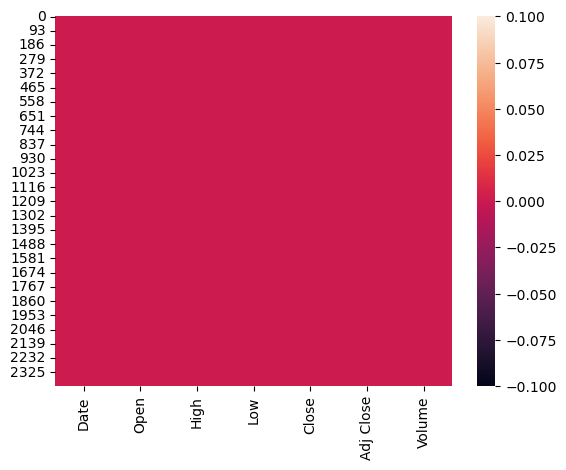

In [17]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

here We can clearly visualize that there is no missing data present.

In [19]:
"""def augFeatures(df):

df["Date"] = pd.to_datetime(df["Date"])

df["year"] = df["Date"].dt.year

df["month"] = df["Date"].dt.month

df["date"]= df["Date"].dt.day

df["day"] = df["Date"].dt.dayofweek

df df.drop(["Date"], axis-1, inplace=True)

return df

df_feat-augFeatures (df)"""

'def augFeatures(df):\n\ndf["Date"] = pd.to_datetime(df["Date"])\n\ndf["year"] = df["Date"].dt.year\n\ndf["month"] = df["Date"].dt.month\n\ndf["date"]= df["Date"].dt.day\n\ndf["day"] = df["Date"].dt.dayofweek\n\ndf df.drop(["Date"], axis-1, inplace=True)\n\nreturn df\n\ndf_feat-augFeatures\xa0(df)'

In [24]:
 # data science
"""
Anything
data science

"""

'\nAnything\ndata science\n\n'

In [27]:
# Converting the datatype of Date column from object to datetime
df['Date']=pd.to_datetime(df.Date, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [34]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [35]:
# setting Data as DataFrame inded
df.set_index('Date',inplace=True)

The set_index() function is used to set the DataFrame index using exiting columns.

In [39]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [40]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
Open,2132
High,2128
Low,2136
Close,2225
Adj Close,2225
Volume,2391


In [41]:
# Checking the value counts of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Open
30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: count, Length: 2132, dtype: int64


High
34.500000     7
28.000000     7
30.000000     7
27.000000     6
34.799999     5
             ..
225.490005    1
206.789993    1
209.880005    1
205.000000    1
786.140015    1
Name: count, Length: 2128, dtype: int64


Low
27.299999     6
28.000000     6
203.000000    5
27.900000     4
28.250000     4
             ..
232.429993    1
236.059998    1
244.410004    1
249.449997    1
673.520020    1
Name: count, Length: 2136, dtype: int64


Close
27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.979996    1
237.789993    1
780.000000    1
Name: count, Length: 2225, dtype: int64


Adj Close
27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
23

so, we will drop the close coumn since they contain saame values.

In [42]:
df.drop(["Adj Close"],axis=1, inplace=True)

In [43]:
#i=df.drop(["Adj Close"],axis=1)

In [45]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [48]:
# Checking Duplicate values in Dataframe
print('Total Duplicate Rows are ', df.duplicated().sum())

Total Duplicate Rows are  0


# Description of Dataset

In [47]:
# Statistical summary of numerical columns 
df.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can observe the following:-

The counts of all the columns are same which means there are no missing values in the dataset.

The median(50%) value is greater than the mean in Open, High, Low, Close columns which means the data is skewed to left in these column.

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present int he data.

We can also notice the Standard deviation, minimum value, 25% percentile values from this describe method.

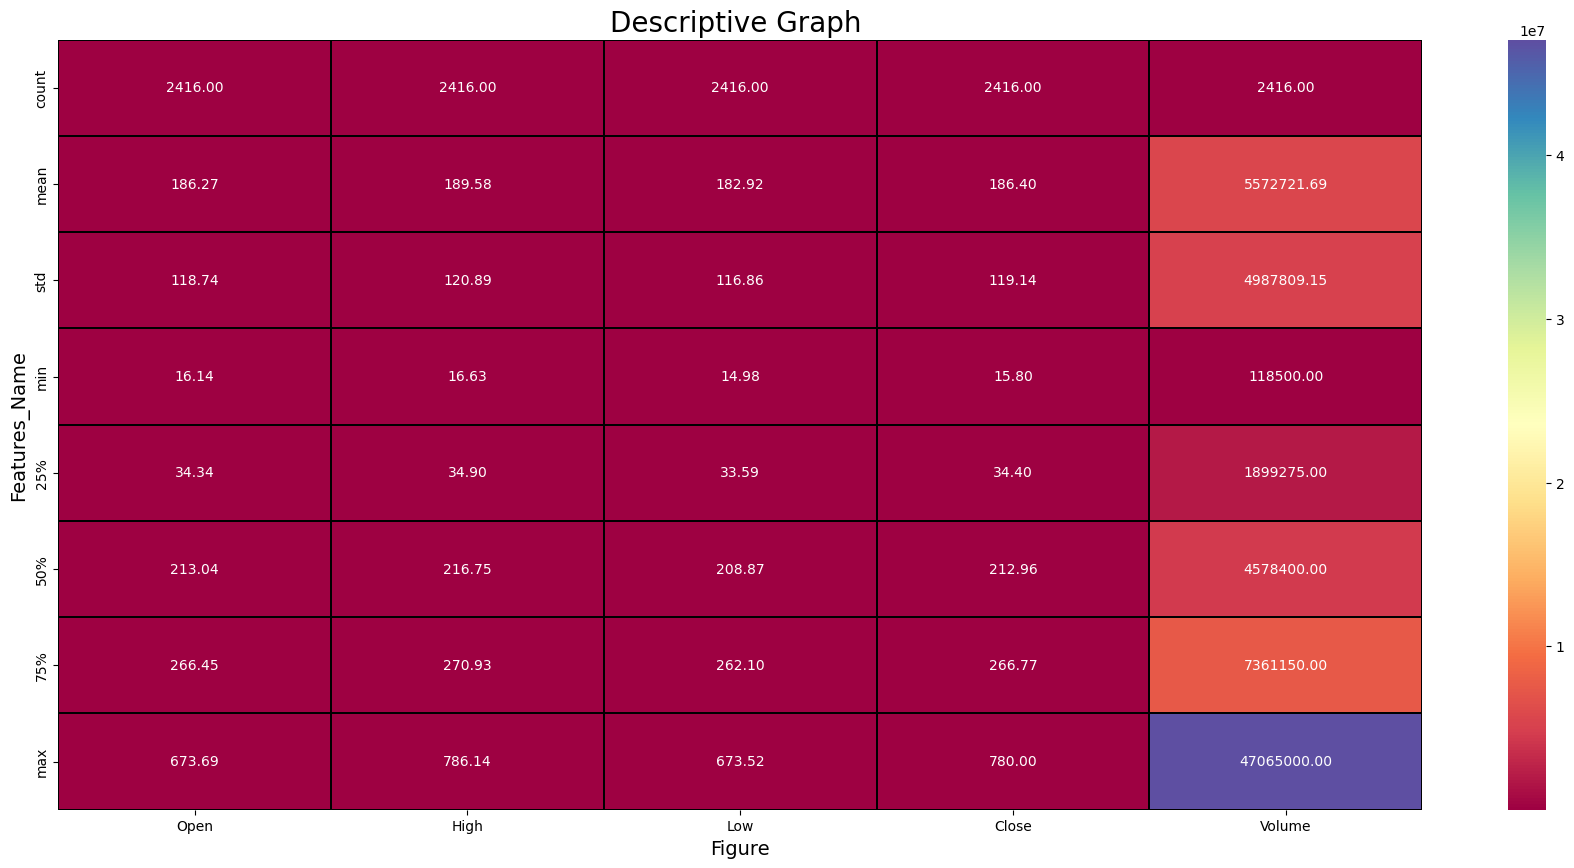

In [50]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True, fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph ', fontsize=20)
plt.show()

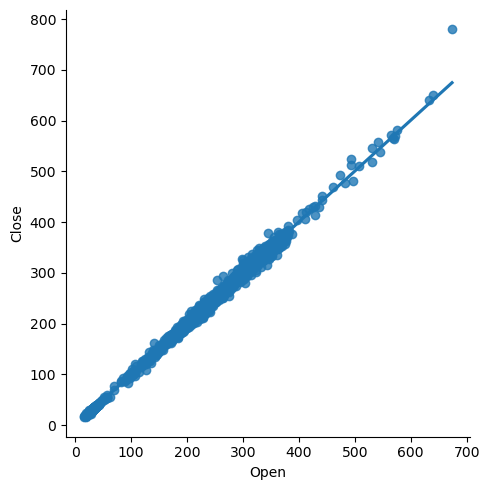

In [51]:
sns.lmplot(x='Open',y='Close',data=df, palette='colorblind')

open has a positive correlation  with close 
# ABOUT "lmplot"
https://seaborn.pydata.org/generated/seaborn.lmplot.html

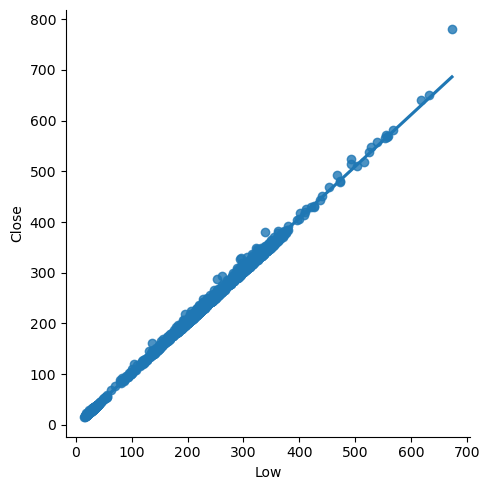

In [53]:
sns.lmplot(x='Low',y='Close',data=df, palette='colorblind')

# Time= 1.44

low has a positige correlatio with close

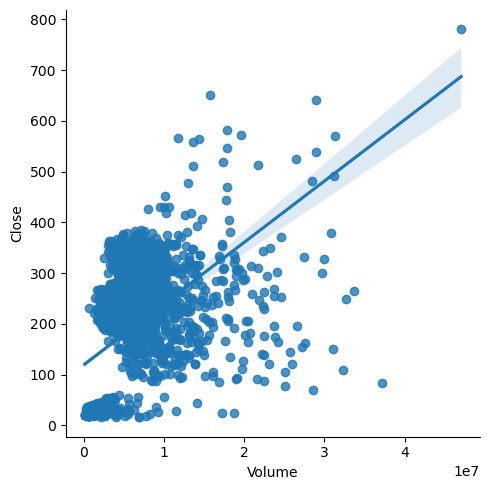

In [55]:
sns.lmplot(x='Volume',y='Close',data=df,palette='colorblind')

volume has a positive correelation with close

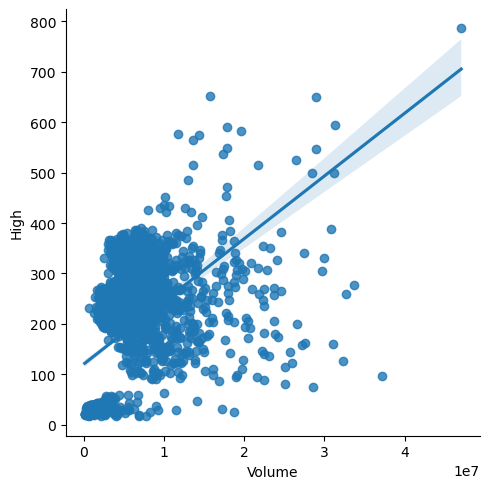

In [56]:
sns.lmplot(x='Volume',y='High',data=df, palette='colorblind')

Volume has not a positive correlation with High

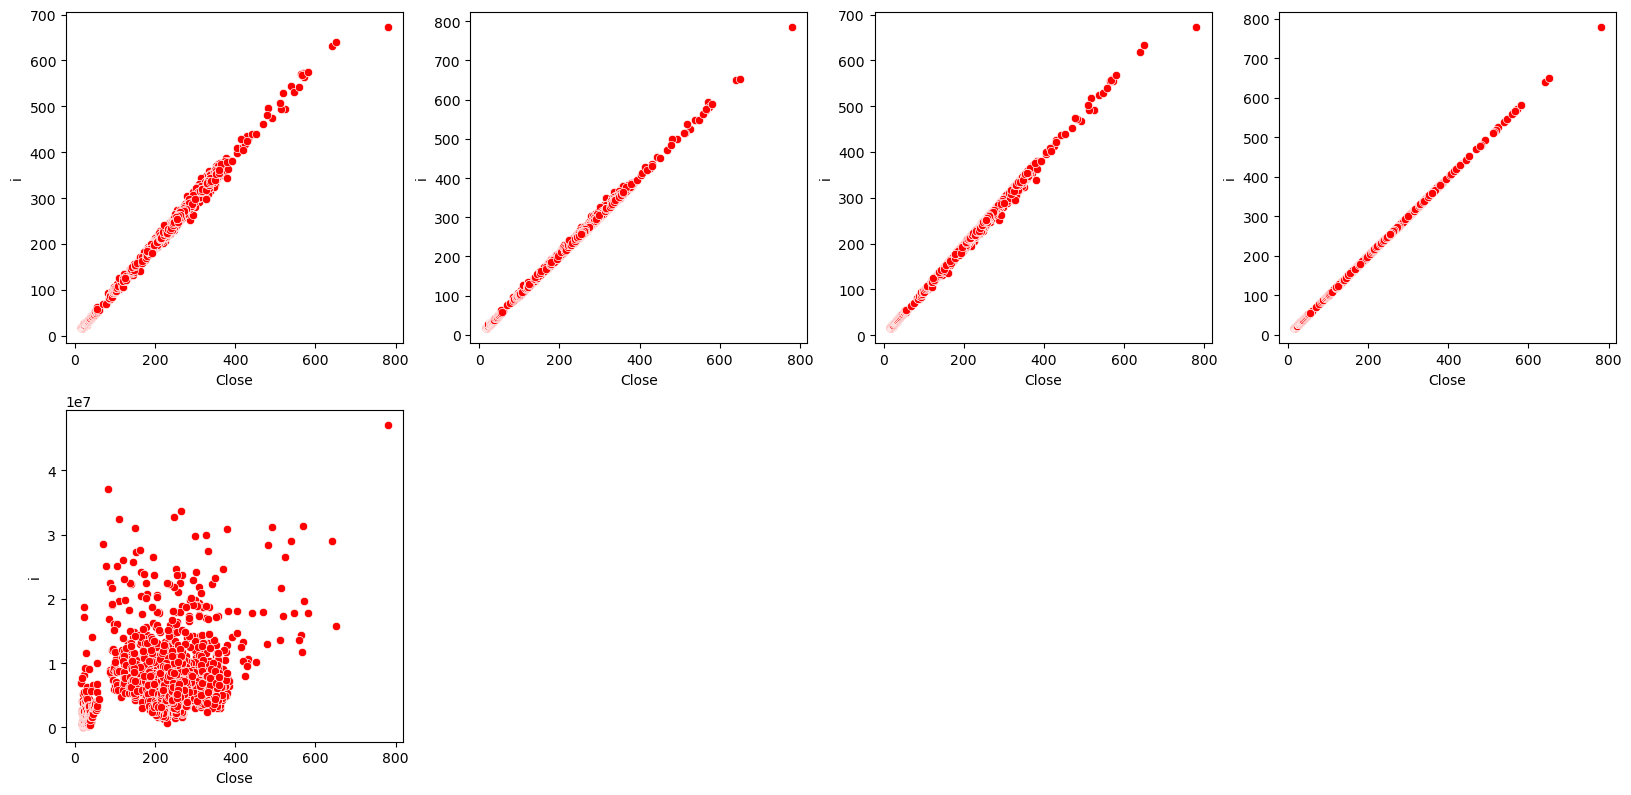

In [59]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Close',y=i,data=df,color='r')
        plt.xlabel('Close')
        plt.ylabel('i')
    p+=1
    
plt.show()

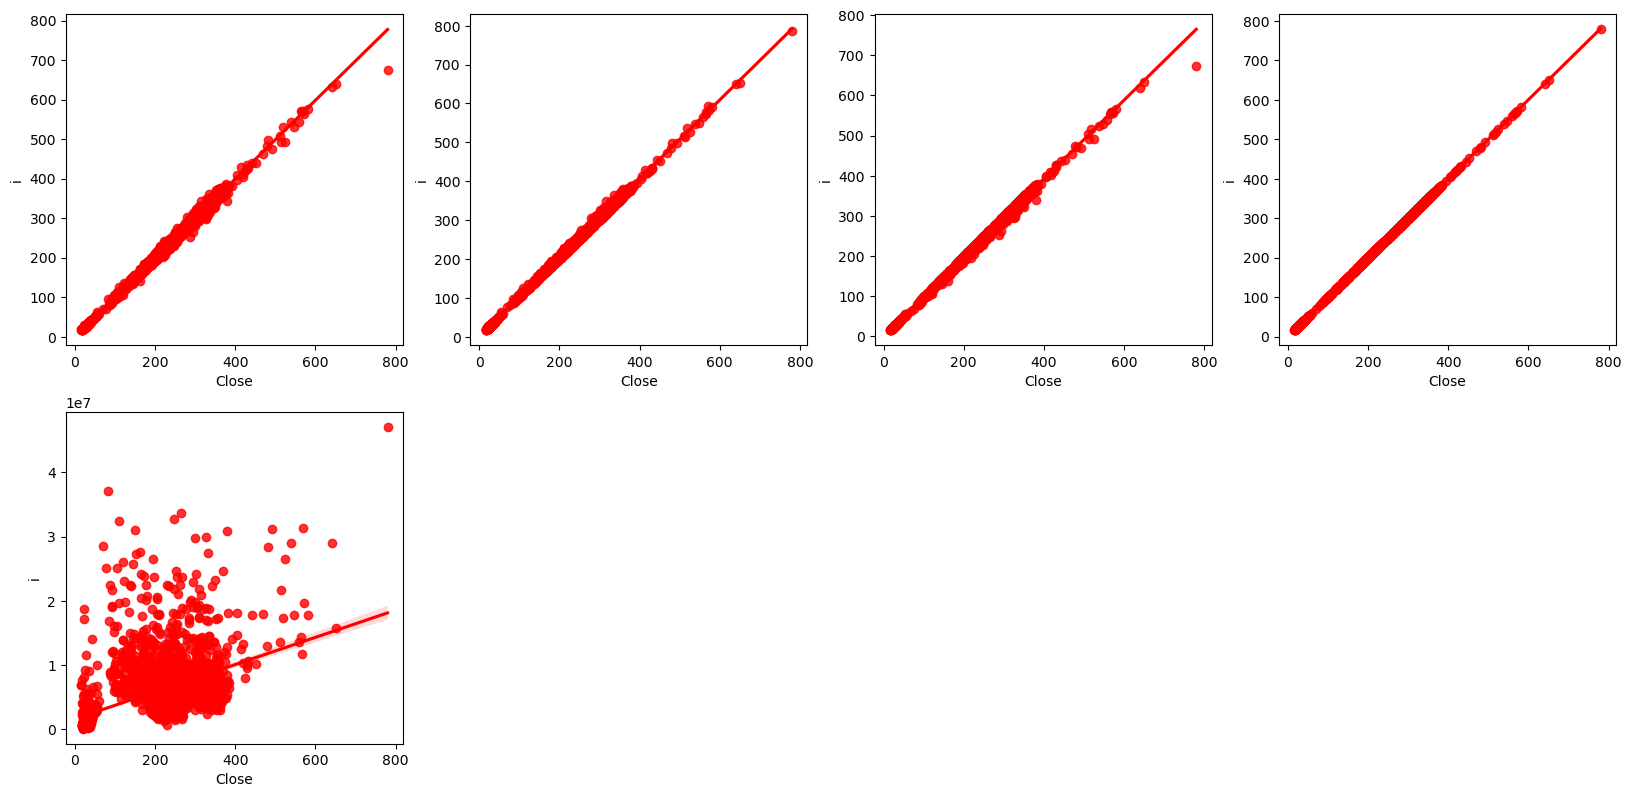

In [60]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='Close',y=i,data=df,color='r')
        plt.xlabel('Close')
        plt.ylabel('i')
    p+=1
    
plt.show()

from this figure we can identify that all the features except volume have a high positive linear relationship with the target variable 

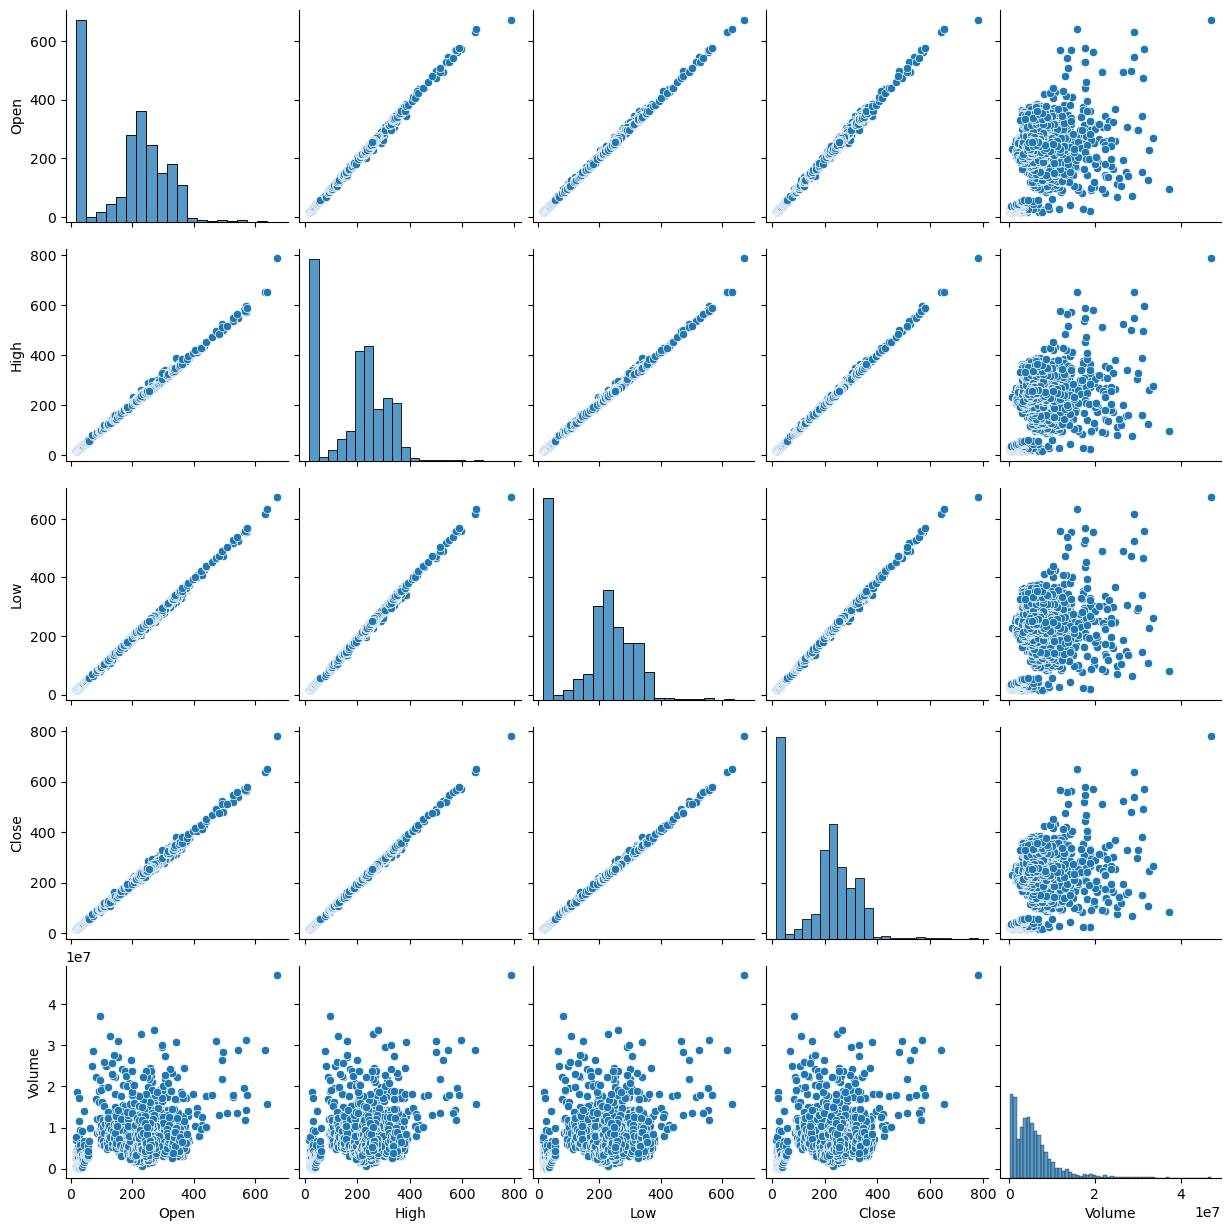

In [61]:
sns.pairplot(data=df, palette='Dark2')

the pairplot gives the pariwise relation between the features. On the diagonal we can notice the distribution plots.

The features Low, High and Open have strong linear relation with each other.

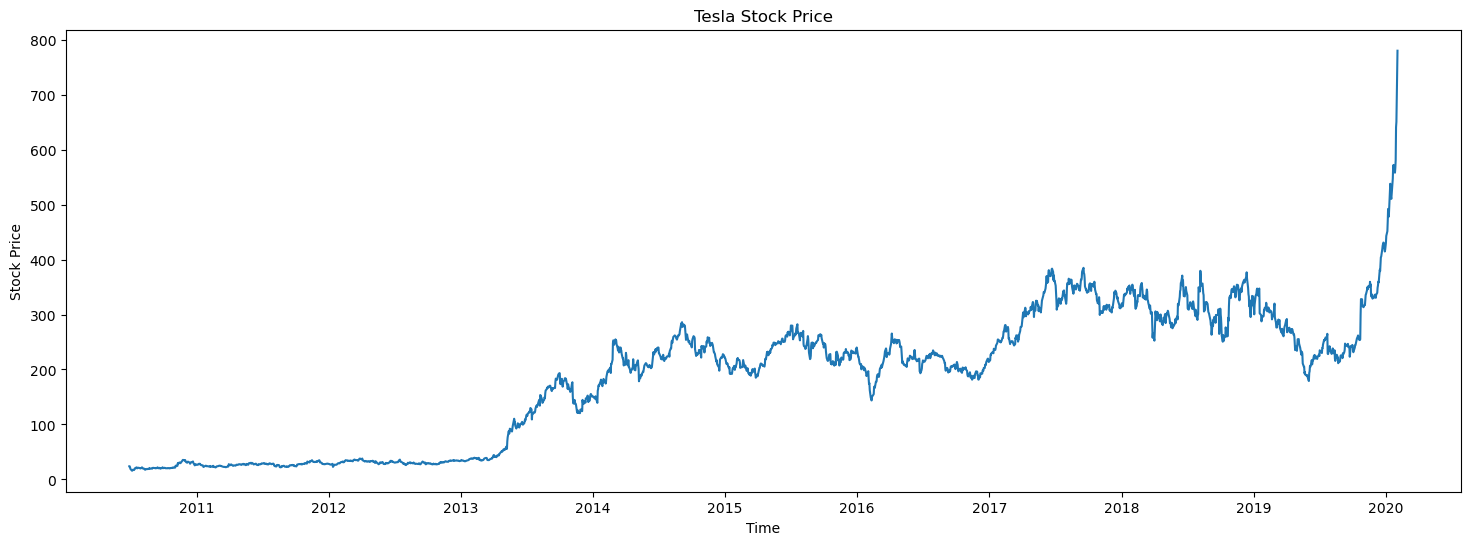

In [62]:
plt.figure(figsize=(18,6))
plt.plot(df.Close, label='closing price')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Tesla Stock Price')
plt.show()

Text(0.5, 1.0, 'The General Trand of all values')

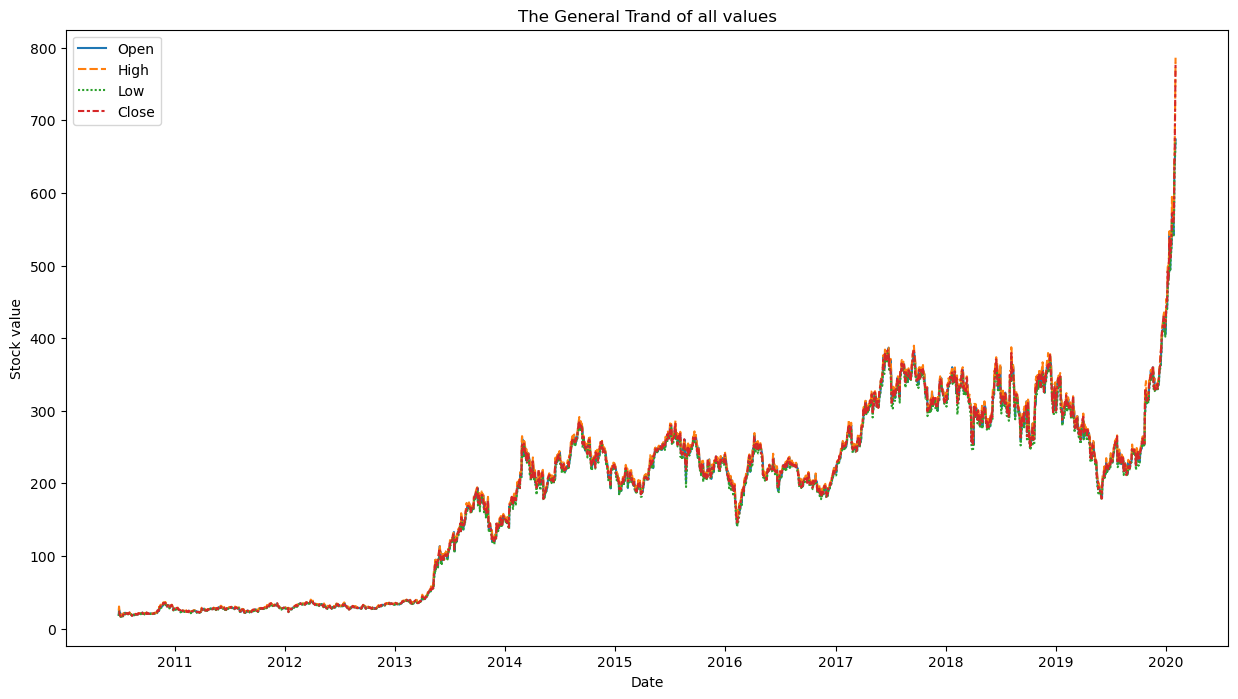

In [63]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('Stock value')
plt.title('The General Trand of all values')

# Find the Outliers 

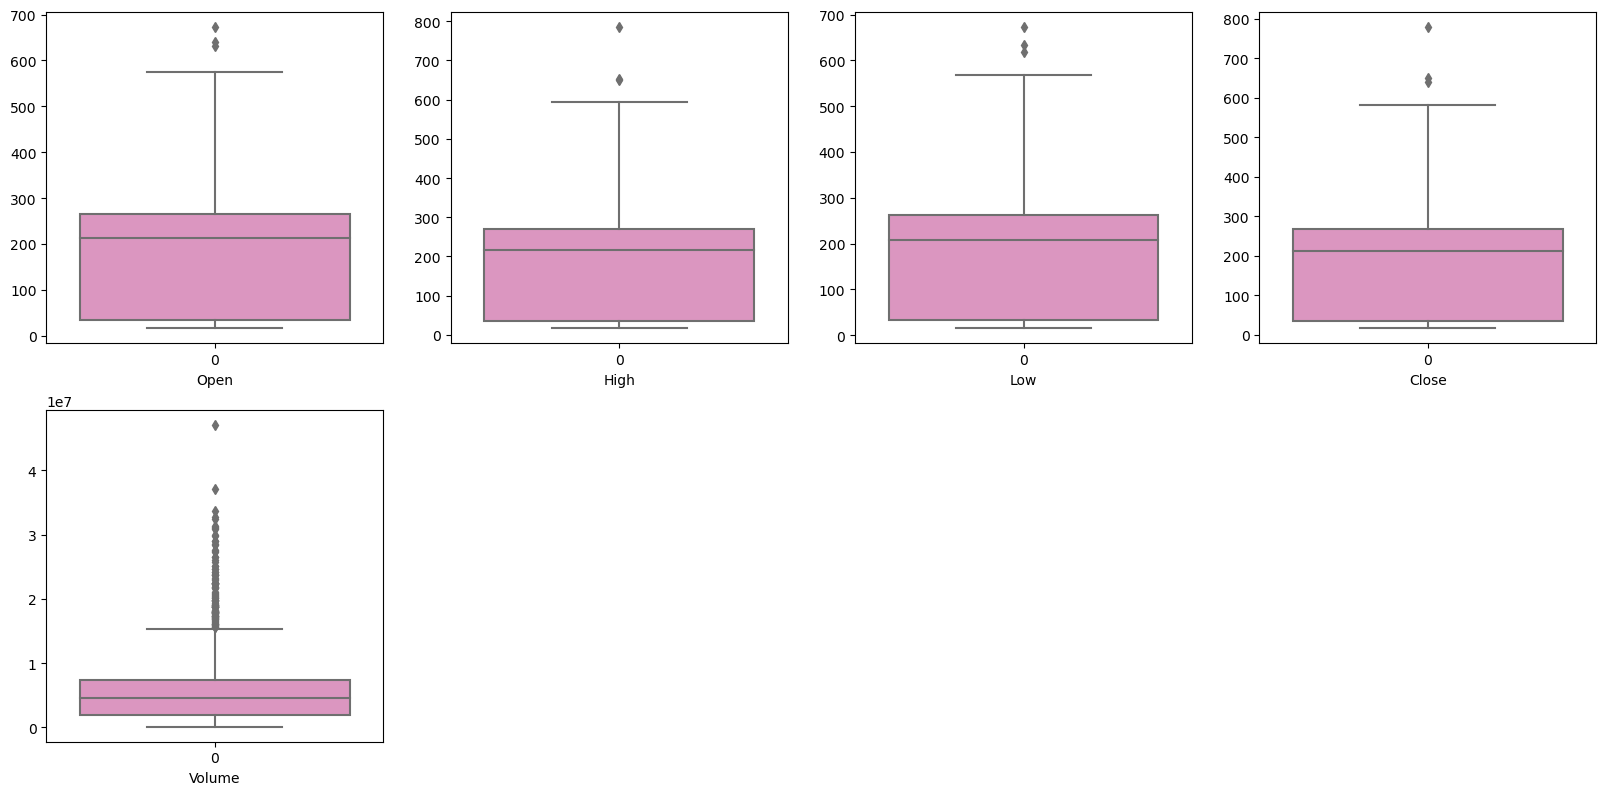

In [65]:
## Lets check the outliers by plotting boxplot.
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

so we have found outlier in all Columns,

# Note:--
One time we will set the algorithm with outlier and one time we will try to set algorithms after removing outliers

So, removing the outliers using zscore and IQR techniques before building the model and selected best one. 

In [67]:
from scipy.stats import zscore
out_features=df[['Open','High','Low','Volume']]
z=np.abs(zscore(out_features))
z

,Open,High,Low,Volume
Date,,,,
2010-06-29,1.409007,1.361644,1.415491,2.645713
2010-06-30,1.351812,1.316801,1.366190,2.329035
2010-07-01,1.358466,1.354032,1.392124,0.530619
2010-07-02,1.375313,1.377364,1.405477,0.086814
2010-07-06,1.400584,1.403012,1.430127,0.259522
...,...,...,...,...
2020-01-28,3.219618,3.203776,3.211097,1.246452
2020-01-29,3.280267,3.311249,3.291125,2.452241
2020-01-30,3.758132,3.816597,3.723964,4.699023


In [69]:
# thereshold=3
np.where(z>3)

(array([ 720,  721,  722,  723,  725,  733,  766,  767,  783,  795,  821,
         822,  845,  846,  847,  848,  854,  864,  892,  920,  921, 1506,
        1950, 2002, 2038, 2041, 2042, 2063, 2078, 2079, 2097, 2098, 2154,
        2182, 2206, 2220, 2221, 2226, 2240, 2283, 2347, 2348, 2398, 2399,
        2401, 2402, 2402, 2404, 2407, 2407, 2407, 2407, 2408, 2408, 2408,
        2409, 2409, 2409, 2410, 2410, 2411, 2411, 2411, 2412, 2412, 2412,
        2413, 2413, 2413, 2413, 2414, 2414, 2414, 2415, 2415, 2415, 2415],
       dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 3, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3], dtype=int64))

Thsi are the outliers present in the columns 

here, 720- row no and 3- column no

In [70]:
z.iloc[723,3]

6.3349894289721185

In [71]:
#z=(datapoint/observed value- mean of the sample/ standard deviation of the sample)

In [73]:
# Now removing the data above  Zscore and creating ne DF
df1=df[(z<3).all(axis=1)]



In [74]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2020-01-07,461.399994,471.630005,453.359985,469.059998,17882100
2020-01-10,481.790009,484.940002,473.700012,478.149994,12959500
2020-01-15,529.760010,537.840027,516.789978,518.500000,17368800


In [76]:
print(df.shape)
print(df1.shape)

(2416, 5)
(2360, 5)


In [77]:
""" 
x- has independent variables
y- target variable 
z=np.abs(zscore(x))
x1=x[(z<3).all(axis=1)]

y1=y[(z<3).all(axis=1)]

df=df[(z<3).all(axis=1)]
"""

' \nx- has independent variables\ny- target variable \nz=np.abs(zscore(x))\nx1=x[(z<3).all(axis=1)]\n\ny1=y[(z<3).all(axis=1)]\n\ndf=df[(z<3).all(axis=1)]\n'

In [81]:
# shape of old and New DataFrame
print("Old Data Frame- ", df.shape[0])
print("New Data Frame- ", df1.shape[0])

Old Data Frame-  2416
New Data Frame-  2360


In [83]:
# Checking Percentage how many % of data are removed
print('Data Loss Precentage-',((df.shape[0]-df1.shape[0])/df.shape[0])*100 )

Data Loss Precentage- 2.3178807947019866


In [86]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2020-01-07,461.399994,471.630005,453.359985,469.059998,17882100
2020-01-10,481.790009,484.940002,473.700012,478.149994,12959500
2020-01-15,529.760010,537.840027,516.789978,518.500000,17368800


# Removing Outliers by the IQR Methods 

In [96]:
# 1st Quantile
Q1=out_features.quantile(0.25)

# 3rd Quantile
Q3=out_features.quantile(0.75)
# IQR 
IQR= Q3 - Q1
df2=[~((df < (Q1-1.5 * IQR))|(df> (Q3+ 1.5 * IQR))).any(axis=1)]

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [97]:
df2.shape

NameError: name 'df2' is not defined

In [98]:
print('Data Loss Percentage After removing outliers with IQR method- ', ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

NameError: name 'df2' is not defined